In [1]:
# from google.colab import drive
# drive.mount('/gdrive')

In [2]:
# cd /gdrive/MyDrive/182/procgen/christian/train_procgen_pfrl/

In [3]:
# ! pip install -r requirements.txt

In [4]:
# ! pip install pfrl

In [15]:
# ! pip install procgen

In [16]:
from policies import ImpalaCNN, TMPNet, TMPNet3, SmallCNN
from procgen import ProcgenEnv
from vec_env import VecExtractDictObs
from vec_env import VecMonitor
from vec_env import VecNormalize
import torch

In [17]:
venv = ProcgenEnv(
    num_envs=1,
    env_name='fruitbot',
    num_levels=0,
    start_level=0,
    distribution_mode='easy',
    num_threads=1,
)
venv = VecExtractDictObs(venv, "rgb")
venv = VecMonitor(venv=venv, filename=None, keep_buf=100)
venv = VecNormalize(venv=venv, ob=False)

In [18]:
# impala = ImpalaCNN(
#     obs_space=venv.observation_space,
#     num_outputs=venv.action_space.n,
# )

# small_distill_3 = SmallCNN(
    
# )

# model1 = TMPNet(
#     obs_space=venv.observation_space,
#     num_outputs=venv.action_space.n,
#     grad_on=True
# )

# model2 = TMPNet3(
#     obs_space=venv.observation_space,
#     num_outputs=venv.action_space.n,
# )

In [19]:
# model_path = 'log/fruitbot/nlev_500_easy/num-envs=64/trial01/model_final.pt'
# state_dict = torch.load(model_path, map_location=torch.device('cpu'))
# model.load_state_dict(state_dict)

In [20]:
# model_path1 = 'log/fruitbot/nlev_500_easy/bb=ppo+tmpv1grad_num-envs=32_si=50/trial01/model_final.pt'
# state_dict = torch.load(model_path1, map_location=torch.device('cpu'))
# model1.load_state_dict(state_dict)

In [21]:
# model_path2 = 'log/fruitbot/nlev_500_easy/bb=ppo+tmpv3_num-envs=32/trial01/model_final.pt'
# state_dict = torch.load(model_path2, map_location=torch.device('cpu'))
# model2.load_state_dict(state_dict)

# Analyzing Performance

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
log_ADAM_base = 'log_ADAM/fruitbot/nlev_500_easy/'
log_small_base = 'logs_small/fruitbot/nlev_500_easy/'

## Teacher and Regular Stats

### Available Experiments

In [112]:
import os
available_experiments = os.listdir('log_ADAM/fruitbot/nlev_500_easy/')
available_experiments

['distill_env-num=32_max-layers=3_reduction=batchmean_T=4',
 'distill_env-num=32_max-layers=2',
 'distill_env-num=32_max-layers=3_reduction=batchmean_alpha=None',
 'distill_env-num=32_max-layers=2_reduction=batchmean_alphasched=5e6',
 'distill_env-num=32_max-layers=3_out-scale=0-5',
 'distill_env-num=32_max-layers=3_reduction=batchmean_alpha=0',
 'distill_env-num=32_max-layers=1_out-scale=0-5',
 'distill_vanilla',
 'distill_env-num=32_max-layers=1',
 'distill_env-num=32_max-layers=1_reduction=batchmean',
 'distill_env-num=32_max-layers=3_reduction=batchmean',
 'distill_env-num=32_max-layers=3_reduction=batchmean_out-scale=0-5',
 'distill_env-num=32_vanilla',
 'distill_env-num=32_max-layers=3_reduction=batchmean_T=2',
 'distill_env-num=32_max-layers=2_reduction=batchmean',
 'distill_env-num=32_max-layers=3_out-scale=0-25',
 'distill_env-num=32_max-layers=3_reduction=batchmean_out-scale=0-25',
 'distill_env-num=32_max-layers=3_out-scale=0-5_reduction=batchmean_alpha=None',
 'distill_env-

In [88]:
[i for i in available_experiments if 'max-layers=2' in i and 'reduction' in i]

['distill_env-num=32_max-layers=2_reduction=batchmean_alphasched=5e6']

### Controll

In [73]:
# progress = pd.read_csv('log/fruitbot/nlev_500_easy/num-envs=64/trial01/progress.csv')
teacher = pd.read_csv('logs/pre-trained/ppo_num-envs=64_vanilla/progress.csv')

# Regular Training: 
progress_r3 = pd.read_csv('logs_small/fruitbot/nlev_500_easy/small_max-layers=3/trial02/progress.csv')
progress_r3_s50 = pd.read_csv('logs_small/fruitbot/nlev_500_easy/small_max-layers=3_out-scale=0-5/trial02/progress.csv')
progress_r3_s25 = pd.read_csv('logs_small/fruitbot/nlev_500_easy/small_max-layers=3_out-scale=0-25/trial02/progress.csv')
progress_r2 = pd.read_csv('logs_small/fruitbot/nlev_500_easy/small_max-layers=2/trial02/progress.csv')
progress_r1 = pd.read_csv('logs_small/fruitbot/nlev_500_easy/small_max-layers=1/trial02/progress.csv')

### Distillation

#### Max-Layers: 3
Reduction = Mean

In [ ]:
progress_d3 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/distill_env-num=32_vanilla/trial02/progress.csv')

# Distillation: Max-Layers 3, Varying Out-Scale -> {0.5, 0.25}
progress_d3_s50 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/distill_env-num=32_max-layers=3_out-scale=0-5/trial02/progress.csv')
progress_d3_s25 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/distill_env-num=32_max-layers=3_out-scale=0-25/trial02/progress.csv')

Reduction = Batchmean

In [89]:
# Distillation: Max-Layers 3, Reduction batchmean, Varying Alpha -> {0.5, e^{-step_cnt / 5e6} 0.0, None}
progress_d3_bm = pd.read_csv(
    'log_ADAM/fruitbot/nlev_500_easy/distill_env-num=32_max-layers=3_reduction=batchmean/trial02/progress.csv'
)
progress_d3_bm_aSched5e6 = pd.read_csv(
    'log_ADAM/fruitbot/nlev_500_easy/distill_env-num=32_max-layers=3_reduction=batchmean_alphasched=5e6/trial02/progress.csv'
)
progress_d3_bm_a0 = pd.read_csv(
    'log_ADAM/fruitbot/nlev_500_easy/distill_env-num=32_max-layers=3_reduction=batchmean_alpha=0/trial02/progress.csv'
)
progress_d3_bm_aNone = pd.read_csv(
    'log_ADAM/fruitbot/nlev_500_easy/distill_env-num=32_max-layers=3_reduction=batchmean_alpha=None/trial02/progress.csv'
)

# Distillation: Max-Layers 3, Reduction batchmean, Alpha 0.5, Varying Out-Scale -> {0.5, 0.25}
progress_d3_bm_s50 = pd.read_csv(
    'log_ADAM/fruitbot/nlev_500_easy/distill_env-num=32_max-layers=3_reduction=batchmean_out-scale=0-5/trial02/progress.csv'
)
progress_d3_bm_s25 = pd.read_csv(
    'log_ADAM/fruitbot/nlev_500_easy/distill_env-num=32_max-layers=3_reduction=batchmean_out-scale=0-25/trial02/progress.csv'
)

# Distillation: Max-Layers 3, Reduction batchmean, Out-Scale 0.5, Varying Alpha -> {0, None}
progress_d3_s50_bm_a0 = pd.read_csv(
    'log_ADAM/fruitbot/nlev_500_easy/distill_env-num=32_max-layers=3_out-scale=0-5_reduction=batchmean_alpha=0/trial02/progress.csv'
)
progress_d3_s50_bm_aNone = pd.read_csv(
    'log_ADAM/fruitbot/nlev_500_easy/distill_env-num=32_max-layers=3_out-scale=0-5_reduction=batchmean_alpha=None/trial02/progress.csv'
)

#### Max-Layers: 2

In [106]:
progress_d2 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/distill_env-num=32_max-layers=2/trial02/progress.csv')
progress_d2_bm = pd.read_csv(
    'log_ADAM/fruitbot/nlev_500_easy/distill_env-num=32_max-layers=2_reduction=batchmean/trial02/progress.csv'
)

#### Max-Layers: 1

In [108]:
progress_d1 = pd.read_csv('log_ADAM/fruitbot/nlev_500_easy/distill_env-num=32_max-layers=1/trial02/progress.csv')
progress_d1_bm = pd.read_csv(
    'log_ADAM/fruitbot/nlev_500_easy/distill_env-num=32_max-layers=1_reduction=batchmean/trial02/progress.csv'
)

## Plotting

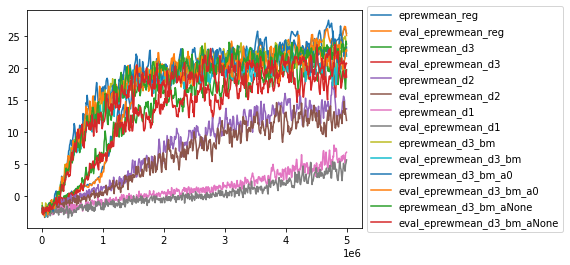

In [70]:
plt.plot(teacher['total_steps'], teacher['eprewmean'], label="eprewmean_reg")
plt.plot(teacher['total_steps'], teacher['eval_eprewmean'], label="eval_eprewmean_reg")
plt.plot(progress_d3['total_steps'], progress_d3['eprewmean'], label="eprewmean_d3")
plt.plot(progress_d3['total_steps'], progress_d3['eval_eprewmean'], label="eval_eprewmean_d3")
plt.plot(progress_d2['total_steps'], progress_d2['eprewmean'], label="eprewmean_d2")
plt.plot(progress_d2['total_steps'], progress_d2['eval_eprewmean'], label="eval_eprewmean_d2")
plt.plot(progress_d1['total_steps'], progress_d1['eprewmean'], label="eprewmean_d1")
plt.plot(progress_d1['total_steps'], progress_d1['eval_eprewmean'], label="eval_eprewmean_d1")

# batchnorm experiments
plt.plot(progress_d3_bm['total_steps'], progress_d3_bm['eprewmean'], label="eprewmean_d3_bm")
plt.plot(progress_d3_bm['total_steps'], progress_d3_bm['eval_eprewmean'], label="eval_eprewmean_d3_bm")
plt.plot(progress_d3_bm_a0['total_steps'], progress_d3_bm_a0['eprewmean'], label="eprewmean_d3_bm_a0")
plt.plot(progress_d3_bm_a0['total_steps'], progress_d3_bm_a0['eval_eprewmean'], label="eval_eprewmean_d3_bm_a0")
plt.plot(progress_d3_bm_aNone['total_steps'], progress_d3_bm_aNone['eprewmean'], label="eprewmean_d3_bm_aNone")
plt.plot(progress_d3_bm_aNone['total_steps'], progress_d3_bm_aNone['eval_eprewmean'], label="eval_eprewmean_d3_bm_aNone")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

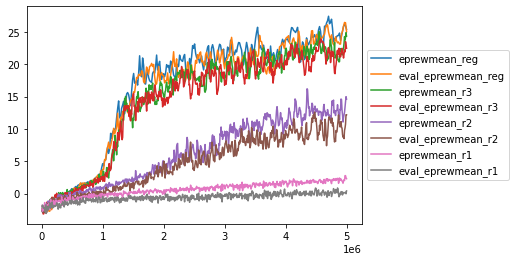

In [58]:
plt.plot(teacher['total_steps'], teacher['eprewmean'], label="eprewmean_reg")
plt.plot(teacher['total_steps'], teacher['eval_eprewmean'], label="eval_eprewmean_reg")
plt.plot(progress_r3['total_steps'], progress_r3['eprewmean'], label="eprewmean_r3")
plt.plot(progress_r3['total_steps'], progress_r3['eval_eprewmean'], label="eval_eprewmean_r3")
plt.plot(progress_r2['total_steps'], progress_r2['eprewmean'], label="eprewmean_r2")
plt.plot(progress_r2['total_steps'], progress_r2['eval_eprewmean'], label="eval_eprewmean_r2")
plt.plot(progress_r1['total_steps'], progress_r1['eprewmean'], label="eprewmean_r1")
plt.plot(progress_r1['total_steps'], progress_r1['eval_eprewmean'], label="eval_eprewmean_r1")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

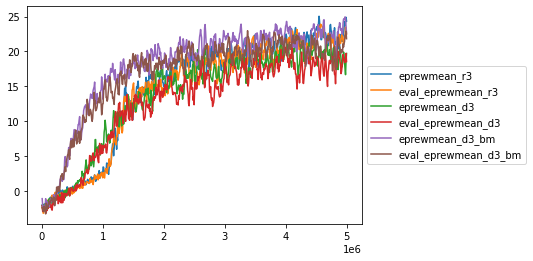

In [99]:
plt.plot(progress_r3['total_steps'], progress_r3['eprewmean'], label="eprewmean_r3")
plt.plot(progress_r3['total_steps'], progress_r3['eval_eprewmean'], label="eval_eprewmean_r3")
plt.plot(progress_d3['total_steps'], progress_d3['eprewmean'], label="eprewmean_d3")
plt.plot(progress_d3['total_steps'], progress_d3['eval_eprewmean'], label="eval_eprewmean_d3")

# batchnorm experiments
plt.plot(progress_d3_bm['total_steps'], progress_d3_bm['eprewmean'], label="eprewmean_d3_bm")
plt.plot(progress_d3_bm['total_steps'], progress_d3_bm['eval_eprewmean'], label="eval_eprewmean_d3_bm")
# plt.plot(progress_d3_bm_a0['total_steps'], progress_d3_bm_a0['eprewmean'], label="eprewmean_d3_bm_a0")
# plt.plot(progress_d3_bm_a0['total_steps'], progress_d3_bm_a0['eval_eprewmean'], label="eval_eprewmean_d3_bm_a0")
# plt.plot(progress_d3_bm_aNone['total_steps'], progress_d3_bm_aNone['eprewmean'], label="eprewmean_d3_bm_aNone")
# plt.plot(progress_d3_bm_aNone['total_steps'], progress_d3_bm_aNone['eval_eprewmean'], label="eval_eprewmean_d3_bm_aNone")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

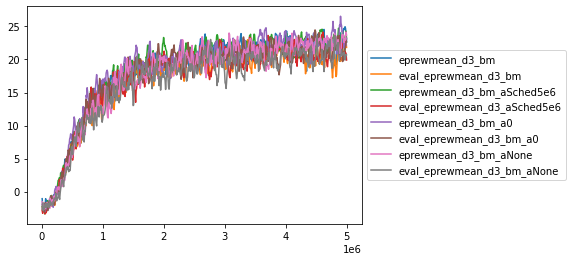

In [98]:
# batchnorm experiments
plt.plot(progress_d3_bm['total_steps'], progress_d3_bm['eprewmean'], label="eprewmean_d3_bm")
plt.plot(progress_d3_bm['total_steps'], progress_d3_bm['eval_eprewmean'], label="eval_eprewmean_d3_bm")

plt.plot(progress_d3_bm_aSched5e6['total_steps'], progress_d3_bm_aSched5e6['eprewmean'], label="eprewmean_d3_bm_aSched5e6")
plt.plot(progress_d3_bm_aSched5e6['total_steps'], progress_d3_bm_aSched5e6['eval_eprewmean'], label="eval_eprewmean_d3_aSched5e6")

plt.plot(progress_d3_bm_a0['total_steps'], progress_d3_bm_a0['eprewmean'], label="eprewmean_d3_bm_a0")
plt.plot(progress_d3_bm_a0['total_steps'], progress_d3_bm_a0['eval_eprewmean'], label="eval_eprewmean_d3_bm_a0")

plt.plot(progress_d3_bm_aNone['total_steps'], progress_d3_bm_aNone['eprewmean'], label="eprewmean_d3_bm_aNone")
plt.plot(progress_d3_bm_aNone['total_steps'], progress_d3_bm_aNone['eval_eprewmean'], label="eval_eprewmean_d3_bm_aNone")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [101]:
# plt.plot(teacher['total_steps'], teacher['eprewmean'], label="eprewmean_reg")
# plt.plot(teacher['total_steps'], teacher['eval_eprewmean'], label="eval_eprewmean_reg")

# # batchnorm experiments
# plt.plot(progress_d3_bm['total_steps'], progress_d3_bm['eprewmean'], label="eprewmean_d3_bm")
# plt.plot(progress_d3_bm['total_steps'], progress_d3_bm['eval_eprewmean'], label="eval_eprewmean_d3_bm")
# # plt.plot(progress_d3_bm_a0['total_steps'], progress_d3_bm_a0['eprewmean'], label="eprewmean_d3_bm_a0")
# # plt.plot(progress_d3_bm_a0['total_steps'], progress_d3_bm_a0['eval_eprewmean'], label="eval_eprewmean_d3_bm_a0")

# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

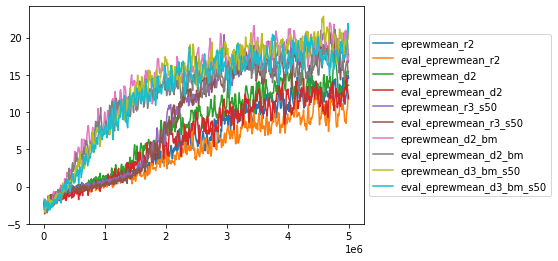

In [107]:
plt.plot(progress_r2['total_steps'], progress_r2['eprewmean'], label="eprewmean_r2")
plt.plot(progress_r2['total_steps'], progress_r2['eval_eprewmean'], label="eval_eprewmean_r2")
plt.plot(progress_d2['total_steps'], progress_d2['eprewmean'], label="eprewmean_d2")
plt.plot(progress_d2['total_steps'], progress_d2['eval_eprewmean'], label="eval_eprewmean_d2")

plt.plot(progress_r3_s50['total_steps'], progress_r3_s50['eprewmean'], label="eprewmean_r3_s50")
plt.plot(progress_r3_s50['total_steps'], progress_r3_s50['eval_eprewmean'], label="eval_eprewmean_r3_s50")
# plt.plot(progress_d3_s50['total_steps'], progress_d3_s50['eprewmean'], label="eprewmean_d3_s50")
# plt.plot(progress_d3_s50['total_steps'], progress_d3_s50['eval_eprewmean'], label="eval_eprewmean_d3_s50")

# plt.plot(progress_r3_s25['total_steps'], progress_r3_s25['eprewmean'], label="eprewmean_r3_s25")
# plt.plot(progress_r3_s25['total_steps'], progress_r3_s25['eval_eprewmean'], label="eval_eprewmean_r3_s25")
# plt.plot(progress_d3_s25['total_steps'], progress_d3_s25['eprewmean'], label="eprewmean_d3_s25")
# plt.plot(progress_d3_s25['total_steps'], progress_d3_s25['eval_eprewmean'], label="eval_eprewmean_d3_s25")

# Batchmean experiments
plt.plot(progress_d2_bm['total_steps'], progress_d2_bm['eprewmean'], label="eprewmean_d2_bm")
plt.plot(progress_d2_bm['total_steps'], progress_d2_bm['eval_eprewmean'], label="eval_eprewmean_d2_bm")
plt.plot(progress_d3_bm_s50['total_steps'], progress_d3_bm_s50['eprewmean'], label="eprewmean_d3_bm_s50")
plt.plot(progress_d3_bm_s50['total_steps'], progress_d3_bm_s50['eval_eprewmean'], label="eval_eprewmean_d3_bm_s50")
# plt.plot(progress_d3_bm_s25['total_steps'], progress_d3_bm_s25['eprewmean'], label="eprewmean_d3_bm_s25")
# plt.plot(progress_d3_bm_s25['total_steps'], progress_d3_bm_s25['eval_eprewmean'], label="eval_eprewmean_d3_bm_s25")

# plt.plot(progress_d3_s50_bm_a0['total_steps'], progress_d3_s50_bm_a0['eprewmean'], label="eprewmean_d3_s50_bm_a0")
# plt.plot(progress_d3_s50_bm_a0['total_steps'], progress_d3_s50_bm_a0['eval_eprewmean'], label="eval_eprewmean_d3_s50_bm_a0")
# plt.plot(progress_d3_s50_bm_aNone['total_steps'], progress_d3_s50_bm_aNone['eprewmean'], label="eprewmean_d3_s50_bm_aNone")
# plt.plot(progress_d3_s50_bm_aNone['total_steps'], progress_d3_s50_bm_aNone['eval_eprewmean'], label="eval_eprewmean_d3_s50_bm_aNone")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

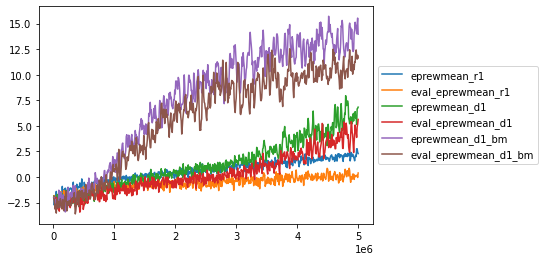

In [111]:
plt.plot(progress_r1['total_steps'], progress_r1['eprewmean'], label="eprewmean_r1")
plt.plot(progress_r1['total_steps'], progress_r1['eval_eprewmean'], label="eval_eprewmean_r1")
plt.plot(progress_d1['total_steps'], progress_d1['eprewmean'], label="eprewmean_d1")
plt.plot(progress_d1['total_steps'], progress_d1['eval_eprewmean'], label="eval_eprewmean_d1")

# plt.plot(progress_r3_s25['total_steps'], progress_r3_s25['eprewmean'], label="eprewmean_r3_s25")
# plt.plot(progress_r3_s25['total_steps'], progress_r3_s25['eval_eprewmean'], label="eval_eprewmean_r3_s25")

# Batchmean experiments
plt.plot(progress_d1_bm['total_steps'], progress_d1_bm['eprewmean'], label="eprewmean_d1_bm")
plt.plot(progress_d1_bm['total_steps'], progress_d1_bm['eval_eprewmean'], label="eval_eprewmean_d1_bm")
# plt.plot(progress_d3_bm_s25['total_steps'], progress_d3_bm_s25['eprewmean'], label="eprewmean_d3_bm_s25")
# plt.plot(progress_d3_bm_s25['total_steps'], progress_d3_bm_s25['eval_eprewmean'], label="eval_eprewmean_d3_bm_s25")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

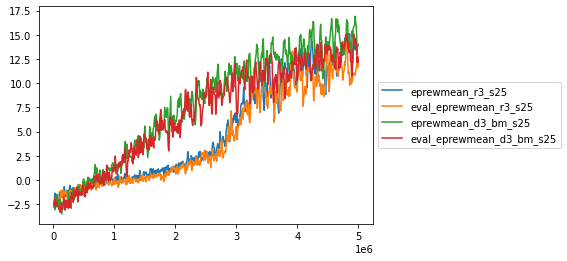

In [110]:
# plt.plot(progress_r1['total_steps'], progress_r1['eprewmean'], label="eprewmean_r1")
# plt.plot(progress_r1['total_steps'], progress_r1['eval_eprewmean'], label="eval_eprewmean_r1")
# plt.plot(progress_d1['total_steps'], progress_d1['eprewmean'], label="eprewmean_d1")
# plt.plot(progress_d1['total_steps'], progress_d1['eval_eprewmean'], label="eval_eprewmean_d1")

plt.plot(progress_r3_s25['total_steps'], progress_r3_s25['eprewmean'], label="eprewmean_r3_s25")
plt.plot(progress_r3_s25['total_steps'], progress_r3_s25['eval_eprewmean'], label="eval_eprewmean_r3_s25")

# Batchmean experiments
# plt.plot(progress_d1_bm['total_steps'], progress_d1_bm['eprewmean'], label="eprewmean_d1_bm")
# plt.plot(progress_d1_bm['total_steps'], progress_d1_bm['eval_eprewmean'], label="eval_eprewmean_d1_bm")
plt.plot(progress_d3_bm_s25['total_steps'], progress_d3_bm_s25['eprewmean'], label="eprewmean_d3_bm_s25")
plt.plot(progress_d3_bm_s25['total_steps'], progress_d3_bm_s25['eval_eprewmean'], label="eval_eprewmean_d3_bm_s25")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

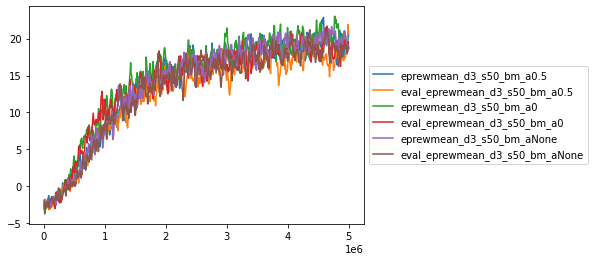

In [97]:
plt.plot(progress_d3_bm_s50['total_steps'], progress_d3_bm_s50['eprewmean'], label="eprewmean_d3_s50_bm_a0.5")
plt.plot(progress_d3_bm_s50['total_steps'], progress_d3_bm_s50['eval_eprewmean'], label="eval_eprewmean_d3_s50_bm_a0.5")

plt.plot(progress_d3_s50_bm_a0['total_steps'], progress_d3_s50_bm_a0['eprewmean'], label="eprewmean_d3_s50_bm_a0")
plt.plot(progress_d3_s50_bm_a0['total_steps'], progress_d3_s50_bm_a0['eval_eprewmean'], label="eval_eprewmean_d3_s50_bm_a0")

plt.plot(progress_d3_s50_bm_aNone['total_steps'], progress_d3_s50_bm_aNone['eprewmean'], label="eprewmean_d3_s50_bm_aNone")
plt.plot(progress_d3_s50_bm_aNone['total_steps'], progress_d3_s50_bm_aNone['eval_eprewmean'], label="eval_eprewmean_d3_s50_bm_aNone")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

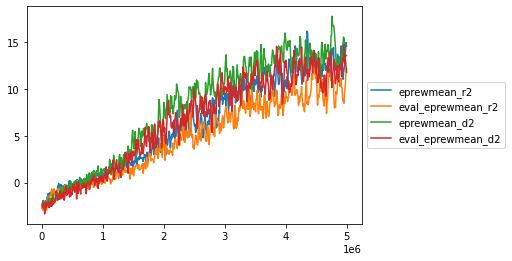

In [78]:
plt.plot(progress_r2['total_steps'], progress_r2['eprewmean'], label="eprewmean_r2")
plt.plot(progress_r2['total_steps'], progress_r2['eval_eprewmean'], label="eval_eprewmean_r2")
plt.plot(progress_d2['total_steps'], progress_d2['eprewmean'], label="eprewmean_d2")
plt.plot(progress_d2['total_steps'], progress_d2['eval_eprewmean'], label="eval_eprewmean_d2")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

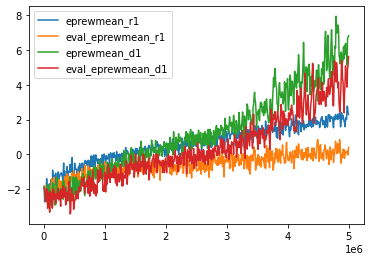

In [44]:
plt.plot(progress_r1['total_steps'], progress_r1['eprewmean'], label="eprewmean_r1")
plt.plot(progress_r1['total_steps'], progress_r1['eval_eprewmean'], label="eval_eprewmean_r1")
plt.plot(progress_d1['total_steps'], progress_d1['eprewmean'], label="eprewmean_d1")
plt.plot(progress_d1['total_steps'], progress_d1['eval_eprewmean'], label="eval_eprewmean_d1")

plt.legend()
plt.show()

In [31]:
# plt.plot(progress['total_steps'], progress['eprewmean'], label="eprewmean_reg")
# plt.plot(progress['total_steps'], progress['eval_eprewmean'], label="eval_eprewmean_reg")
# plt.plot(progress_tmp1['total_steps'], progress_tmp1['eprewmean'], label="eprewmean_tmp1")
# plt.plot(progress_tmp1['total_steps'], progress_tmp1['eval_eprewmean'], label="eval_eprewmean_tmp1")
# plt.plot(progress_tmp2['total_steps'], progress_tmp2['eprewmean'], label="eprewmean_tmp2")
# plt.plot(progress_tmp2['total_steps'], progress_tmp2['eval_eprewmean'], label="eval_eprewmean_tmp2")
# plt.legend()
# plt.show()

In [24]:
eplen_columns = progress[['eplenmean', 'eval_eplenmean', 'total_steps']]
eplen_columns.head()

,eplenmean,eval_eplenmean,total_steps
0,86.14,78.50,16384
1,85.47,83.51,32768
2,82.20,77.65,49152
3,87.03,84.81,65536
4,86.04,85.27,81920


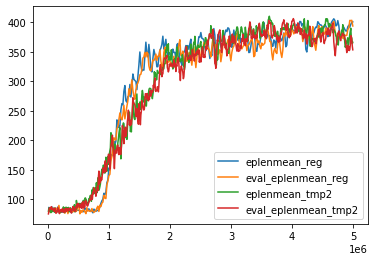

In [25]:
plt.plot(eplen_columns['total_steps'], eplen_columns['eplenmean'], label="eplenmean_reg")
plt.plot(eplen_columns['total_steps'], eplen_columns['eval_eplenmean'], label="eval_eplenmean_reg")
plt.plot(progress_tmp2['total_steps'], progress_tmp2['eplenmean'], label="eplenmean_tmp2")
plt.plot(progress_tmp2['total_steps'], progress_tmp2['eval_eplenmean'], label="eval_eplenmean_tmp2")
plt.legend()
plt.show()

# Analyzing Weights

In [26]:
model

ImpalaCNN(
  (conv_seqs): ModuleList(
    (0): ConvSequence(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (max_pool2d): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (res_block0): ResidualBlock(
        (conv0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (res_block1): ResidualBlock(
        (conv0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (1): ConvSequence(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (max_pool2d): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (res_block0): ResidualBlock(
        (conv0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv1): Conv2d(3

In [27]:
first_layer = model.conv_seqs[0].conv.weight.data.numpy()
first_layer.shape

(16, 3, 3, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

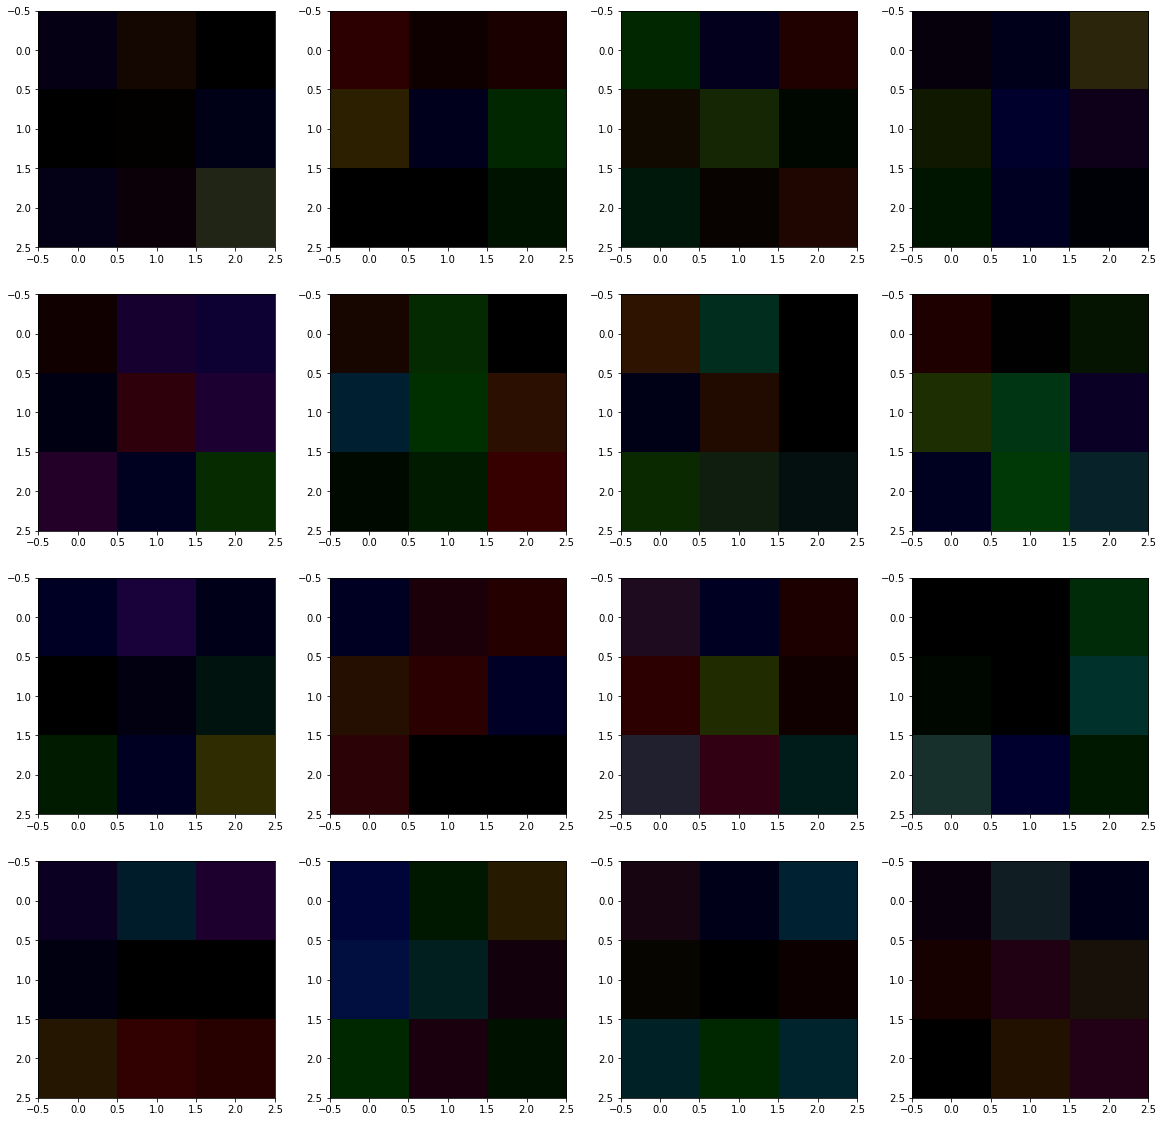

In [28]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

for i in range(4):
    for j in range(4):
        ax[i, j].imshow(first_layer[i * 4 + j].transpose(1, 2, 0))
print()
plt.show()

# Analyzing Weights (Model 2)

In [29]:
model2

TMPNet3(
  (proc_conv): Conv2d(3, 3, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (impala): ImpalaCNN(
    (conv_seqs): ModuleList(
      (0): ConvSequence(
        (conv): Conv2d(20, 26, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (max_pool2d): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (res_block0): ResidualBlock(
          (conv0): Conv2d(26, 26, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (conv1): Conv2d(26, 26, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        (res_block1): ResidualBlock(
          (conv0): Conv2d(26, 26, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (conv1): Conv2d(26, 26, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (1): ConvSequence(
        (conv): Conv2d(26, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (max_pool2d): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (res_b

In [30]:
first_layer2 = model2.proc_conv.weight.data.numpy()
first_layer2.shape

(3, 3, 3, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


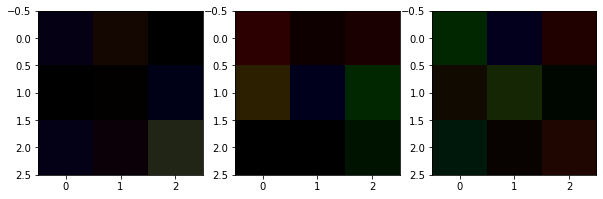

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(10, 10))

for i in range(3):
    ax[i].imshow(first_layer[i].transpose(1, 2, 0))

print()
plt.show()

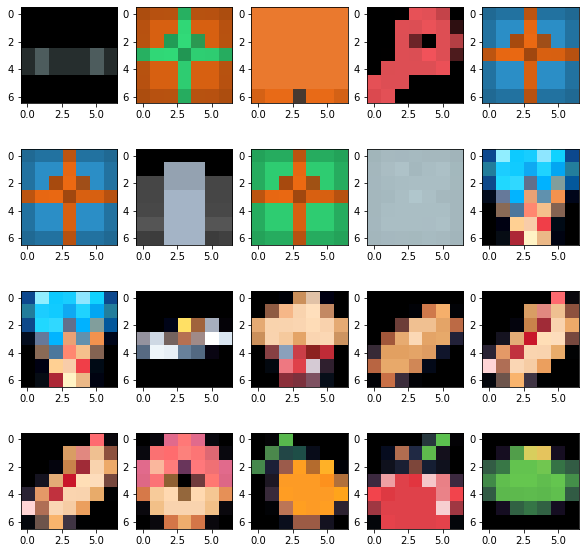

In [32]:
import numpy as np

templates = model2.templates_tensor.numpy()

fig, ax = plt.subplots(4, 5, figsize=(10, 10))

for i in range(4):
    for j in range(5):
        ax[i, j].imshow(templates[i * 4 + j].transpose(1, 2, 0).astype(np.int32))

print()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

[[[ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]]

 [[-1.         -0.9998786   1.        ]
  [-1.          0.99955684  1.        ]
  [-1.         -0.9999479   1.        ]]]


[[[-1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [-1.          1.          1.        ]]

 [[-1.          1.          1.        ]
  [-1.          1.          1.        ]
  [ 0.99999636  1.          1.        ]]

 [[-1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [-1.          1.          1.        ]]]


[[[-1.  1.  1.]
  [-1.  1.  1.]
  [-1.  1.  1.]]

 [[-1.  1.  1.]
  [-1.  1.  1.]
  [-1.  1.  1.]]

 [[-1.  1.  1.]
  [-1.  1.  1.]
  [-1.  1.  1.]]]


[[[ 0.9998899  -1.          1.        ]
  [ 1.          1.          1.        ]
  [-1.          0.99999934  1.  

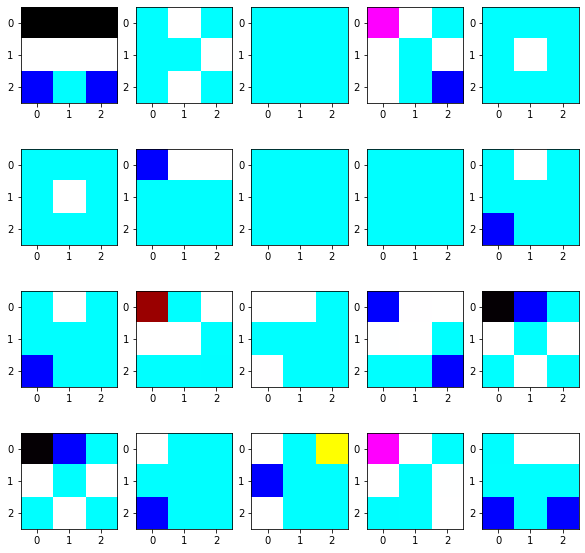

In [44]:
with torch.no_grad():
    learned_filters = torch.tanh(model2.proc_conv(model2.templates_tensor))

learned_filters = learned_filters.numpy()

fig, ax = plt.subplots(4, 5, figsize=(10, 10))

for i in range(4):
    for j in range(5):
        ax[i, j].imshow(learned_filters[i * 4 + j].transpose(1, 2, 0))
        print(learned_filters[i * 4 + j].transpose(1, 2, 0))
        print()
        print()

print()
plt.show()

# Analyzing Direct Edits on the Filter Usage

In [34]:
model1

TMPNet(
  (temp_conv): Conv2d(3, 20, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
  (impala): ImpalaCNN(
    (conv_seqs): ModuleList(
      (0): ConvSequence(
        (conv): Conv2d(20, 26, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (max_pool2d): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (res_block0): ResidualBlock(
          (conv0): Conv2d(26, 26, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (conv1): Conv2d(26, 26, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        (res_block1): ResidualBlock(
          (conv0): Conv2d(26, 26, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (conv1): Conv2d(26, 26, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (1): ConvSequence(
        (conv): Conv2d(26, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (max_pool2d): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False

In [37]:
first_layer = model1.temp_conv.weight.data.numpy()
first_layer.shape

(20, 3, 7, 7)

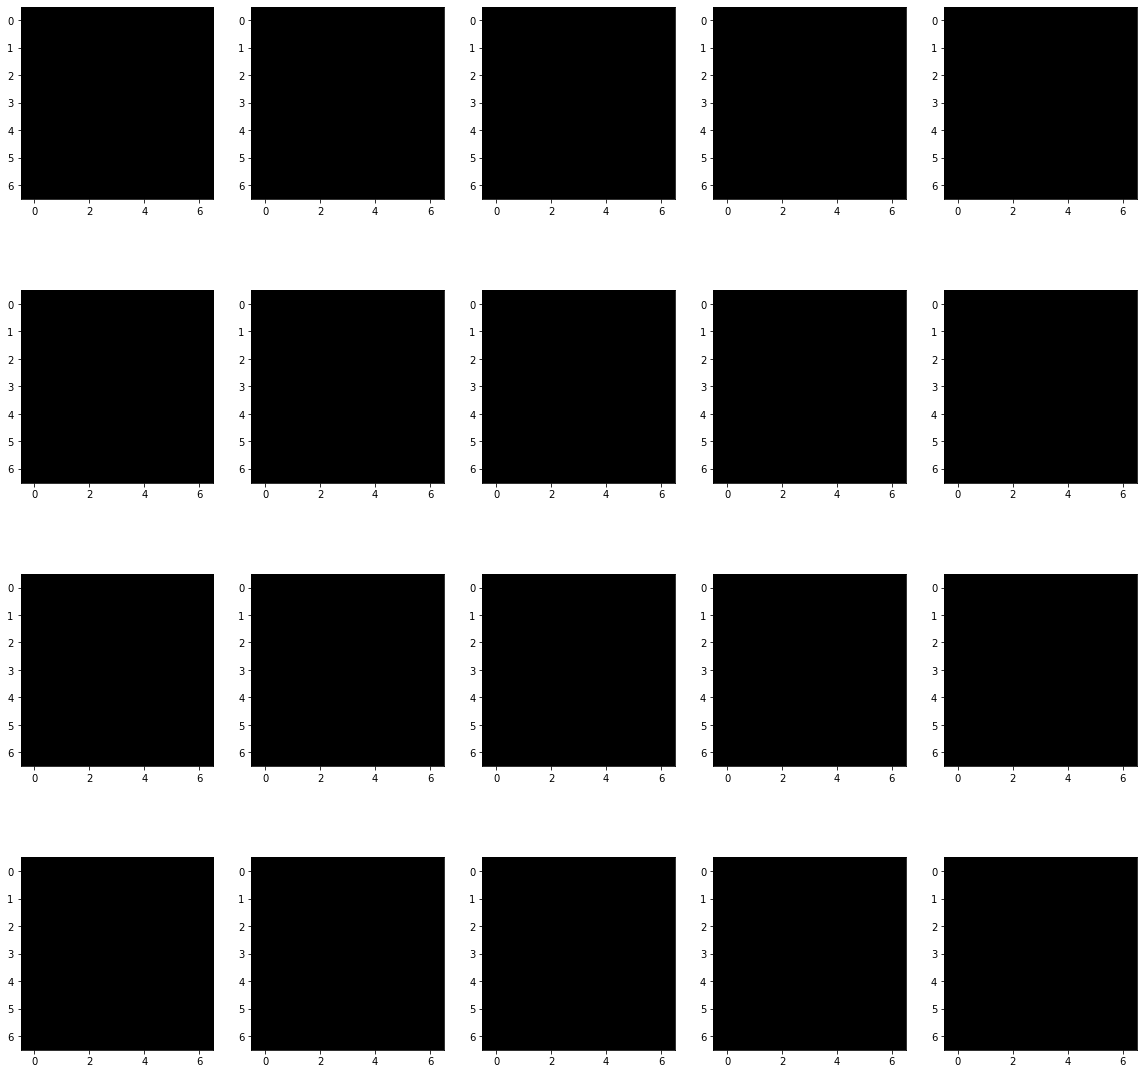

In [39]:
fig, ax = plt.subplots(4, 5, figsize=(20, 20))

for i in range(4):
    for j in range(5):
        ax[i, j].imshow(first_layer[i * 4 + j].transpose(1, 2, 0).astype(np.int32))
print()
plt.show()

In [40]:
np.mean(first_layer), np.std(first_layer)

(1.06436866e-10, 0.02086706)